In [1]:
!pip install pandas numpy
!pip install matplotlib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

1. Implement the midpoint ellipse algorithm.

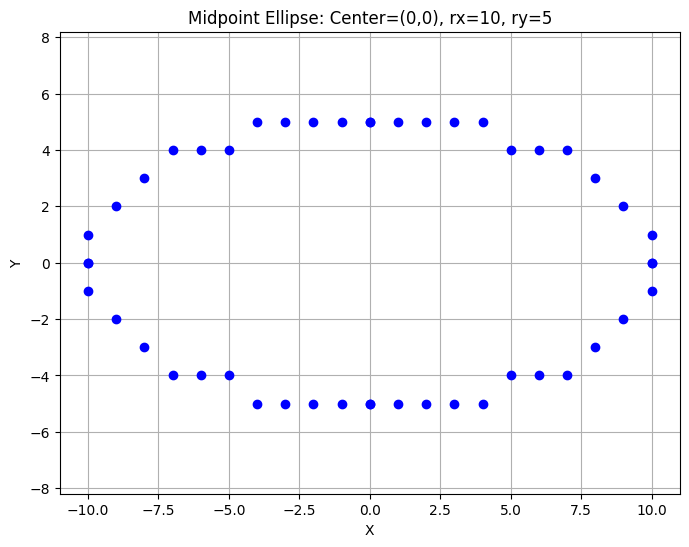

In [4]:

def midpoint_ellipse(xc, yc, rx, ry):
    x_coords = []
    y_coords = []

    x = 0
    y = ry

    rx2 = rx ** 2
    ry2 = ry ** 2

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 2 * ry2 * x
    dy = 2 * rx2 * y

    while dx < dy:
        points = [
            ( xc + x, yc + y),
            ( xc - x, yc + y),
            ( xc + x, yc - y),
            ( xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)

        x += 1
        dx += 2 * ry2
        if p1 < 0:
            p1 += dx + ry2
        else:
            y -= 1
            dy -= 2 * rx2
            p1 += dx - dy + ry2

    p2 = ry2 * (x + 0.5)**2 + rx2 * (y - 1)**2 - rx2 * ry2
    while y >= 0:
        points = [
            ( xc + x, yc + y),
            ( xc - x, yc + y),
            ( xc + x, yc - y),
            ( xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)

        y -= 1
        dy -= 2 * rx2
        if p2 > 0:
            p2 += rx2 - dy
        else:
            x += 1
            dx += 2 * ry2
            p2 += dx - dy + rx2

    return x_coords, y_coords
xc, yc = 0, 0
rx, ry = 10, 5

x_list, y_list = midpoint_ellipse(xc, yc, rx, ry)


plt.figure(figsize=(8,6))
plt.plot(x_list, y_list, 'o', color='blue')
plt.title(f"Midpoint Ellipse: Center=({xc},{yc}), rx={rx}, ry={ry}")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()



2. Draw ellipses with different radii and centres

Ellipse 1: Center=(0,0), rx=10, ry=5
Ellipse 2: Center=(15,5), rx=7, ry=12
Ellipse 3: Center=(-10,-10), rx=5, ry=8
Ellipse 4: Center=(5,-12), rx=8, ry=3


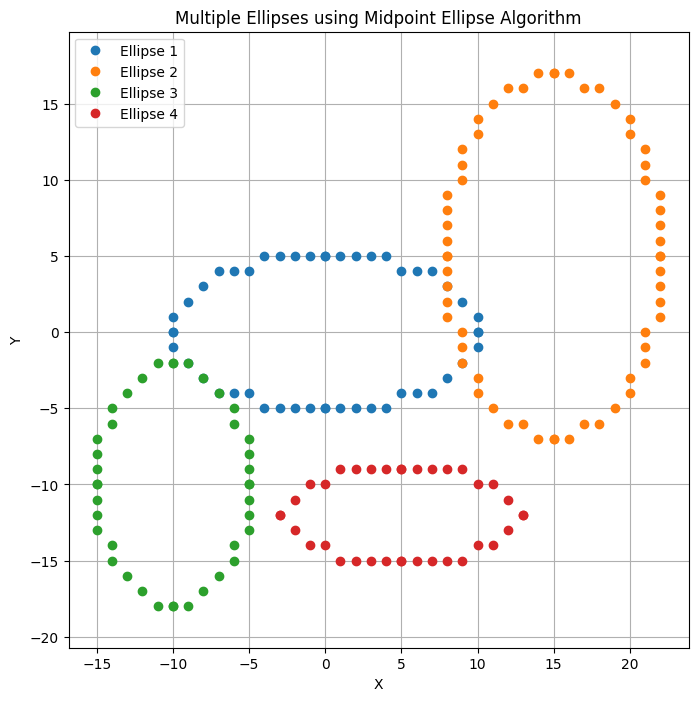

In [5]:

def midpoint_ellipse(xc, yc, rx, ry):
    x_coords = []
    y_coords = []

    x = 0
    y = ry

    rx2 = rx ** 2
    ry2 = ry ** 2

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 2 * ry2 * x
    dy = 2 * rx2 * y

    while dx < dy:
        points = [
            (xc + x, yc + y),
            (xc - x, yc + y),
            (xc + x, yc - y),
            (xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)

        x += 1
        dx += 2 * ry2
        if p1 < 0:
            p1 += dx + ry2
        else:
            y -= 1
            dy -= 2 * rx2
            p1 += dx - dy + ry2

    p2 = ry2 * (x + 0.5)**2 + rx2 * (y - 1)**2 - rx2 * ry2
    while y >= 0:
        points = [
            (xc + x, yc + y),
            (xc - x, yc + y),
            (xc + x, yc - y),
            (xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)

        y -= 1
        dy -= 2 * rx2
        if p2 > 0:
            p2 += rx2 - dy
        else:
            x += 1
            dx += 2 * ry2
            p2 += dx - dy + rx2

    return x_coords, y_coords

ellipses = [
    (0, 0, 10, 5),
    (15, 5, 7, 12),
    (-10, -10, 5, 8),
    (5, -12, 8, 3)
]

plt.figure(figsize=(8,8))
plt.title("Multiple Ellipses using Midpoint Ellipse Algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')  

for i, (xc, yc, rx, ry) in enumerate(ellipses):
    x_list, y_list = midpoint_ellipse(xc, yc, rx, ry)
    print(f"Ellipse {i+1}: Center=({xc},{yc}), rx={rx}, ry={ry}")
    plt.plot(x_list, y_list, 'o', label=f"Ellipse {i+1}")

plt.legend()
plt.show()


3. Compare the point spacing in Region 1 and Region 2

Region 1: 9 points, average spacing = 0.981
Region 2: 3 points, average spacing = 0.805


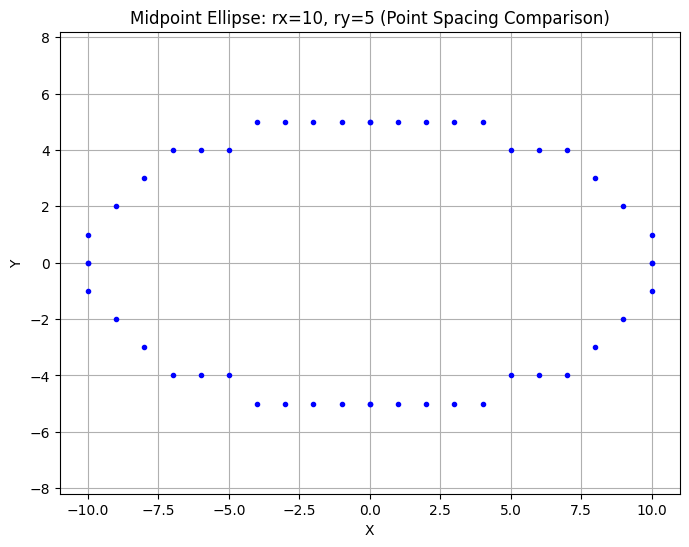

In [7]:
import matplotlib.pyplot as plt
import math

def midpoint_ellipse_spacing(xc, yc, rx, ry):
    x_coords = []
    y_coords = []
    region1_distances = []
    region2_distances = []

    x = 0
    y = ry

    rx2 = rx ** 2
    ry2 = ry ** 2
    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    dx = 2 * ry2 * x
    dy = 2 * rx2 * y

    prev_x, prev_y = x, y
    while dx < dy:
        points = [
            (xc + x, yc + y),
            (xc - x, yc + y),
            (xc + x, yc - y),
            (xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)
        dist = math.sqrt((x - prev_x)**2 + (y - prev_y)**2)
        region1_distances.append(dist)
        prev_x, prev_y = x, y

        x += 1
        dx += 2 * ry2
        if p1 < 0:
            p1 += dx + ry2
        else:
            y -= 1
            dy -= 2 * rx2
            p1 += dx - dy + ry2
    p2 = ry2 * (x + 0.5)**2 + rx2 * (y - 1)**2 - rx2 * ry2
    prev_x2, prev_y2 = x, y
    while y >= 0:
        points = [
            (xc + x, yc + y),
            (xc - x, yc + y),
            (xc + x, yc - y),
            (xc - x, yc - y)
        ]
        for px, py in points:
            x_coords.append(px)
            y_coords.append(py)
        dist = math.sqrt((x - prev_x2)**2 + (y - prev_y2)**2)
        region2_distances.append(dist)
        prev_x2, prev_y2 = x, y

        y -= 1
        dy -= 2 * rx2
        if p2 > 0:
            p2 += rx2 - dy
        else:
            x += 1
            dx += 2 * ry2
            p2 += dx - dy + rx2

    return x_coords, y_coords, region1_distances, region2_distances

xc, yc = 0, 0
rx, ry = 10, 5

x_list, y_list, region1_d, region2_d = midpoint_ellipse_spacing(xc, yc, rx, ry)

print(f"Region 1: {len(region1_d)} points, average spacing = {sum(region1_d)/len(region1_d):.3f}")
print(f"Region 2: {len(region2_d)} points, average spacing = {sum(region2_d)/len(region2_d):.3f}")
plt.figure(figsize=(8,6))
plt.plot(x_list, y_list, 'o', color='blue', markersize=3)
plt.title(f"Midpoint Ellipse: rx={rx}, ry={ry} (Point Spacing Comparison)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()
